# Î™©Ìëú

1. Abstractive Î™®Îç∏ Íµ¨ÏÑ±ÏùÑ ÏúÑÌïú ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨ Îã®Í≥ÑÍ∞Ä Ï≤¥Í≥ÑÏ†ÅÏúºÎ°ú ÏßÑÌñâÎêòÏóàÎã§.	Î∂ÑÏÑùÎã®Í≥Ñ, Ï†ïÏ†úÎã®Í≥Ñ, Ï†ïÍ∑úÌôîÏôÄ Î∂àÏö©Ïñ¥ Ï†úÍ±∞, Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨, Ïù∏ÏΩîÎî© Í≥ºÏ†ïÏù¥ Îπ†ÏßêÏóÜÏù¥ Ï≤¥Í≥ÑÏ†ÅÏúºÎ°ú ÏßÑÌñâÎêòÏóàÎã§.

2. ÌÖçÏä§Ìä∏ ÏöîÏïΩÎ™®Îç∏Ïù¥ ÏÑ±Í≥µÏ†ÅÏúºÎ°ú ÌïôÏäµÎêòÏóàÏùåÏùÑ ÌôïÏù∏ÌïòÏòÄÎã§. Î™®Îç∏ ÌïôÏäµÏù¥ ÏßÑÌñâÎêòÎ©¥ÏÑú train lossÏôÄ validation lossÍ∞Ä Í∞êÏÜåÌïòÎäî Í≤ΩÌñ•ÏùÑ Í∑∏ÎûòÌîÑÎ•º ÌÜµÌï¥ ÌôïÏù∏ÌñàÏúºÎ©∞, Ïã§Ï†ú ÏöîÏïΩÎ¨∏Ïóê ÏûàÎäî ÌïµÏã¨ Îã®Ïñ¥Îì§Ïù¥ ÏöîÏïΩ Î¨∏Ïû• ÏïàÏóê Ìè¨Ìï®ÎêòÏóàÎã§.

3. Extractive ÏöîÏïΩÏùÑ ÏãúÎèÑÌï¥ Î≥¥Í≥† Abstractive ÏöîÏïΩ Í≤∞Í≥ºÍ≥º Ìï®Íªò ÎπÑÍµêÌï¥ Î≥¥ÏïòÎã§.	Îëê ÏöîÏïΩ Í≤∞Í≥ºÎ•º Î¨∏Î≤ïÏôÑÏÑ±ÎèÑ Ï∏°Î©¥Í≥º ÌïµÏã¨Îã®Ïñ¥ Ìè¨Ìï® Ï∏°Î©¥ÏúºÎ°ú ÎÇòÎàÑÏñ¥ ÎπÑÍµêÌïòÍ≥† Î∂ÑÏÑù Í≤∞Í≥ºÎ•º ÌëúÎ°ú Ï†ïÎ¶¨ÌïòÏó¨ Ï†úÏãúÌïòÏòÄÎã§. 


In [1]:
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')
from importlib.metadata import version
import nltk
import tensorflow
import summa
import pandas as pd

[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv(os.getenv("HOME")+"/aiffel/Untitled Folder 4/news_summary_more.csv", nrows=100000)
print('Ï†ÑÏ≤¥ ÏÉòÌîåÏàò :', (len(data)))

Ï†ÑÏ≤¥ ÏÉòÌîåÏàò : 98401


In [3]:
data.head()

headlines  \
0  upGrad learner switches to career in ML & Al w...   
1  Delhi techie wins free food from Swiggy for on...   
2  New Zealand end Rohit Sharma-led India's 12-ma...   
3  Aegon life iTerm insurance plan helps customer...   
4  Have known Hirani for yrs, what if MeToo claim...   

                                                text  
0  Saurav Kant, an alumnus of upGrad and IIIT-B's...  
1  Kunal Shah's credit card bill payment platform...  
2  New Zealand defeated India by 8 wickets in the...  
3  With Aegon Life iTerm Insurance plan, customer...  
4  Speaking about the sexual harassment allegatio...

In [4]:
print('Text Ïó¥ÏóêÏÑú Ï§ëÎ≥µÏùÑ Î∞∞Ï†úÌïú Ïú†ÏùºÌïú ÏÉòÌîåÏùò Ïàò :', data['text'].nunique())
print('Summary Ïó¥ÏóêÏÑú Ï§ëÎ≥µÏùÑ Î∞∞Ï†úÌïú Ïú†ÏùºÌïú ÏÉòÌîåÏùò Ïàò :', data['headlines'].nunique())

Text Ïó¥ÏóêÏÑú Ï§ëÎ≥µÏùÑ Î∞∞Ï†úÌïú Ïú†ÏùºÌïú ÏÉòÌîåÏùò Ïàò : 98360
Summary Ïó¥ÏóêÏÑú Ï§ëÎ≥µÏùÑ Î∞∞Ï†úÌïú Ïú†ÏùºÌïú ÏÉòÌîåÏùò Ïàò : 98280


In [5]:
data.drop_duplicates(subset = ['text'], inplace=True)
print('Ï†ÑÏ≤¥ ÏÉòÌîåÏàò :', (len(data)))

Ï†ÑÏ≤¥ ÏÉòÌîåÏàò : 98360


textÎßå Ï§ëÎ≥µÏùÑ Ï†úÍ±∞Ìï¥Ï£ºÎäî Ïù¥Ïú†Îäî headlines ÏóêÏÑú Í∞ÑÎã®ÌïòÍ≤å ÌïòÎäî Í≤ΩÏö∞ Í≤πÏπ†ÏàòÎèÑ ÏûàÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§.

In [6]:
print(data.isnull().sum())

headlines    0
text         0
dtype: int64


In [7]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("Ï†ïÍ∑úÌôî ÏÇ¨Ï†ÑÏùò Ïàò: ", len(contractions))

Ï†ïÍ∑úÌôî ÏÇ¨Ï†ÑÏùò Ïàò:  120


In [8]:
print('Î∂àÏö©Ïñ¥ Í∞úÏàò :', len(stopwords.words('english') ))
print(stopwords.words('english'))

Î∂àÏö©Ïñ¥ Í∞úÏàò : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 

In [9]:
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # ÌÖçÏä§Ìä∏ ÏÜåÎ¨∏ÏûêÌôî
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> Îì±Ïùò html ÌÉúÍ∑∏ Ï†úÍ±∞
    sentence = re.sub(r'\([^)]*\)', '', sentence) # Í¥ÑÌò∏Î°ú Îã´Ìûå Î¨∏ÏûêÏó¥ (...) Ï†úÍ±∞ Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # ÏåçÎî∞Ïò¥Ìëú " Ï†úÍ±∞
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # ÏïΩÏñ¥ Ï†ïÍ∑úÌôî
    sentence = re.sub(r"'s\b","", sentence) # ÏÜåÏú†Í≤© Ï†úÍ±∞. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # ÏòÅÏñ¥ Ïô∏ Î¨∏Ïûê(Ïà´Ïûê, ÌäπÏàòÎ¨∏Ïûê Îì±) Í≥µÎ∞±ÏúºÎ°ú Î≥ÄÌôò
    sentence = re.sub('[m]{2,}', 'mm', sentence) # mÏù¥ 3Í∞ú Ïù¥ÏÉÅÏù¥Î©¥ 2Í∞úÎ°ú Î≥ÄÍ≤Ω. Ex) ummmmmmm yeah -> umm yeah
    
    # Î∂àÏö©Ïñ¥ Ï†úÍ±∞ (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # Î∂àÏö©Ïñ¥ ÎØ∏Ï†úÍ±∞ (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

In [10]:
clean_text = []

clean_text = [preprocess_sentence(text) for text in data['text']]

# Ï†ÑÏ≤òÎ¶¨ ÌõÑ Ï∂úÎ†•
print("Text Ï†ÑÏ≤òÎ¶¨ ÌõÑ Í≤∞Í≥º: ", clean_text[:5])

Text Ï†ÑÏ≤òÎ¶¨ ÌõÑ Í≤∞Í≥º:  ['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers', 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit', 'new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history', 'aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers o

In [11]:
clean_summary = []

clean_summary = [preprocess_sentence(text) for text in data['headlines']]

# Ï†ÑÏ≤òÎ¶¨ ÌõÑ Ï∂úÎ†•
print("Text Ï†ÑÏ≤òÎ¶¨ ÌõÑ Í≤∞Í≥º: ", clean_text[:5])

Text Ï†ÑÏ≤òÎ¶¨ ÌõÑ Í≤∞Í≥º:  ['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers', 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit', 'new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history', 'aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers o

In [12]:
data['text'] = clean_text
data['headlines'] = clean_summary

# Îπà Í∞íÏùÑ Null Í∞íÏúºÎ°ú Î≥ÄÌôò
data.replace('', np.nan, inplace=True)


In [13]:
data.isnull().sum()

headlines    0
text         0
dtype: int64

In [14]:
data.dropna(axis=0, inplace=True)
print('Ï†ÑÏ≤¥ ÏÉòÌîåÏàò :', (len(data)))

Ï†ÑÏ≤¥ ÏÉòÌîåÏàò : 98360


ÌÖçÏä§Ìä∏Ïùò ÏµúÏÜå Í∏∏Ïù¥ : 1
ÌÖçÏä§Ìä∏Ïùò ÏµúÎåÄ Í∏∏Ïù¥ : 60
ÌÖçÏä§Ìä∏Ïùò ÌèâÍ∑† Í∏∏Ïù¥ : 35.09968483123221
ÏöîÏïΩÏùò ÏµúÏÜå Í∏∏Ïù¥ : 1
ÏöîÏïΩÏùò ÏµúÎåÄ Í∏∏Ïù¥ : 13
ÏöîÏïΩÏùò ÌèâÍ∑† Í∏∏Ïù¥ : 7.136183407889386


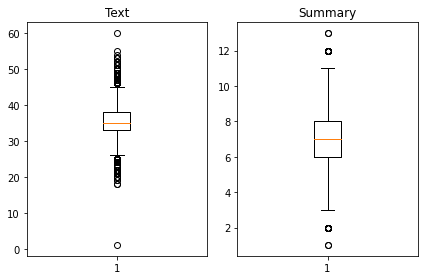

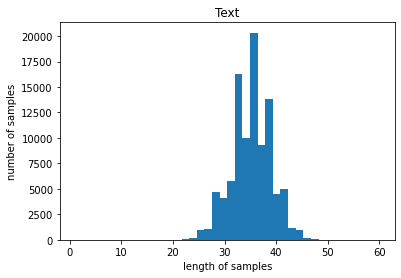

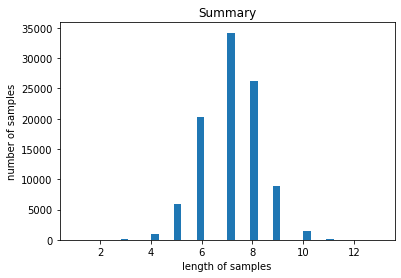

In [15]:
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['text']]
summary_len = [len(s.split()) for s in data['headlines']]

print('ÌÖçÏä§Ìä∏Ïùò ÏµúÏÜå Í∏∏Ïù¥ : {}'.format(np.min(text_len)))
print('ÌÖçÏä§Ìä∏Ïùò ÏµúÎåÄ Í∏∏Ïù¥ : {}'.format(np.max(text_len)))
print('ÌÖçÏä§Ìä∏Ïùò ÌèâÍ∑† Í∏∏Ïù¥ : {}'.format(np.mean(text_len)))
print('ÏöîÏïΩÏùò ÏµúÏÜå Í∏∏Ïù¥ : {}'.format(np.min(summary_len)))
print('ÏöîÏïΩÏùò ÏµúÎåÄ Í∏∏Ïù¥ : {}'.format(np.max(summary_len)))
print('ÏöîÏïΩÏùò ÌèâÍ∑† Í∏∏Ïù¥ : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(summary_len)
plt.title('Summary')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Summary')
plt.hist(summary_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [16]:
text_max_len = 50
summary_max_len = 12

def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('Ï†ÑÏ≤¥ ÏÉòÌîå Ï§ë Í∏∏Ïù¥Í∞Ä %s Ïù¥ÌïòÏù∏ ÏÉòÌîåÏùò ÎπÑÏú®: %s'%(max_len, (cnt / len(nested_list))))

In [17]:
below_threshold_len(text_max_len, data['text'])
below_threshold_len(summary_max_len,  data['headlines'])

Ï†ÑÏ≤¥ ÏÉòÌîå Ï§ë Í∏∏Ïù¥Í∞Ä 50 Ïù¥ÌïòÏù∏ ÏÉòÌîåÏùò ÎπÑÏú®: 0.9998576657177715
Ï†ÑÏ≤¥ ÏÉòÌîå Ï§ë Í∏∏Ïù¥Í∞Ä 12 Ïù¥ÌïòÏù∏ ÏÉòÌîåÏùò ÎπÑÏú®: 0.9999796665311103


In [18]:
data = data[data['text'].str.split().str.len() <= text_max_len]

data = data[data['headlines'].str.split().str.len() <= summary_max_len]

In [19]:
#ÌÜ†ÌÅ∞Ìôî

data['decoder_input'] = data['headlines'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['headlines'].apply(lambda x : x + ' eostoken')
data.head()

encoder_input = np.array(data['text']) # Ïù∏ÏΩîÎçîÏùò ÏûÖÎ†•
decoder_input = np.array(data['decoder_input']) # ÎîîÏΩîÎçîÏùò ÏûÖÎ†•
decoder_target = np.array(data['decoder_target']) # ÎîîÏΩîÎçîÏùò Î†àÏù¥Î∏î


In [20]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[ 2633 42874 42118 ... 19963 87901   510]


In [21]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]
n_of_val = int(len(encoder_input)*0.2)
print('ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Ïàò :', n_of_val)

ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Ïàò : 19668


In [22]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò :', len(encoder_input_train))
print('ÌõàÎ†® Î†àÏù¥Î∏îÏùò Í∞úÏàò :', len(decoder_input_train))
print('ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò :', len(encoder_input_test))
print('ÌÖåÏä§Ìä∏ Î†àÏù¥Î∏îÏùò Í∞úÏàò :', len(decoder_input_test))

ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò : 78676
ÌõàÎ†® Î†àÏù¥Î∏îÏùò Í∞úÏàò : 78676
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò : 19668
ÌÖåÏä§Ìä∏ Î†àÏù¥Î∏îÏùò Í∞úÏàò : 19668


In [23]:
#ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä

src_tokenizer = Tokenizer() # ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Ï†ïÏùò
src_tokenizer.fit_on_texts(encoder_input_train) # ÏûÖÎ†•Îêú Îç∞Ïù¥ÌÑ∞Î°úÎ∂ÄÌÑ∞ Îã®Ïñ¥ ÏßëÌï© ÏÉùÏÑ±

threshold = 7
total_cnt = len(src_tokenizer.word_index) # Îã®Ïñ¥Ïùò Ïàò
rare_cnt = 0 # Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏùÄ Îã®Ïñ¥Ïùò Í∞úÏàòÎ•º Ïπ¥Ïö¥Ìä∏
total_freq = 0 # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Ï†ÑÏ≤¥ Îã®Ïñ¥ ÎπàÎèÑÏàò Ï¥ù Ìï©
rare_freq = 0 # Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏùÄ Îã®Ïñ¥Ïùò Îì±Ïû• ÎπàÎèÑÏàòÏùò Ï¥ù Ìï©

# Îã®Ïñ¥ÏôÄ ÎπàÎèÑÏàòÏùò Ïåç(pair)ÏùÑ keyÏôÄ valueÎ°ú Î∞õÎäîÎã§.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # Îã®Ïñ¥Ïùò Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏúºÎ©¥
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('Îã®Ïñ¥ ÏßëÌï©(vocabulary)Ïùò ÌÅ¨Í∏∞ :', total_cnt)
print('Îì±Ïû• ÎπàÎèÑÍ∞Ä %sÎ≤à Ïù¥ÌïòÏù∏ Ìù¨Í∑Ä Îã®Ïñ¥Ïùò Ïàò: %s'%(threshold - 1, rare_cnt))
print('Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Î•º Ï†úÏô∏ÏãúÌÇ¨ Í≤ΩÏö∞Ïùò Îã®Ïñ¥ ÏßëÌï©Ïùò ÌÅ¨Í∏∞ %s'%(total_cnt - rare_cnt))
print("Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Ïùò ÎπÑÏú®:", (rare_cnt / total_cnt)*100)
print("Ï†ÑÏ≤¥ Îì±Ïû• ÎπàÎèÑÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥ Îì±Ïû• ÎπàÎèÑ ÎπÑÏú®:", (rare_freq / total_freq)*100)


Îã®Ïñ¥ ÏßëÌï©(vocabulary)Ïùò ÌÅ¨Í∏∞ : 69508
Îì±Ïû• ÎπàÎèÑÍ∞Ä 6Î≤à Ïù¥ÌïòÏù∏ Ìù¨Í∑Ä Îã®Ïñ¥Ïùò Ïàò: 47400
Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Î•º Ï†úÏô∏ÏãúÌÇ¨ Í≤ΩÏö∞Ïùò Îã®Ïñ¥ ÏßëÌï©Ïùò ÌÅ¨Í∏∞ 22108
Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Ïùò ÎπÑÏú®: 68.19358922713931
Ï†ÑÏ≤¥ Îì±Ïû• ÎπàÎèÑÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥ Îì±Ïû• ÎπàÎèÑ ÎπÑÏú®: 3.4885224197489197


In [24]:
src_vocab = 22214 # 69569-47355Î°ú Í∞úÏàòÎ•º Ï†ïÌñàÏäµÎãàÎã§.
src_tokenizer = Tokenizer(num_words=src_vocab)
src_tokenizer.fit_on_texts(encoder_input_train) # Îã®Ïñ¥ ÏßëÌï© Ïû¨ÏÉùÏÑ±

In [25]:
# ÌÖçÏä§Ìä∏ ÏãúÌÄÄÏä§Î•º Ï†ïÏàò ÏãúÌÄÄÏä§Î°ú Î≥ÄÌôò
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# Ïûò ÏßÑÌñâÎêòÏóàÎäîÏßÄ ÏÉòÌîå Ï∂úÎ†•
print(encoder_input_train[:3])

[[1180, 4112, 4148, 290, 133, 858, 174, 3486, 22, 133, 365, 897, 840, 174, 365, 897, 3601, 2983, 1084, 1145, 29, 1598, 1829, 1084, 1, 1180], [163, 57, 9, 58, 6412, 2771, 4725, 123, 409, 1799, 181, 7902, 9166, 1904, 1448, 833, 21, 181, 777, 1869, 63, 6413, 653, 2889, 580, 218, 74, 129, 89, 4372, 14823, 48, 295, 108, 2336, 1203, 9], [10482, 3, 13, 2706, 400, 186, 5896, 9836, 623, 2158, 1027, 429, 220, 2330, 386, 3438, 503, 90, 9836, 40, 85, 225, 860, 1575, 3, 13, 159, 2158, 909, 1449, 10736]]


In [26]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

In [27]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # Îã®Ïñ¥Ïùò Ïàò
rare_cnt = 0 # Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏùÄ Îã®Ïñ¥Ïùò Í∞úÏàòÎ•º Ïπ¥Ïö¥Ìä∏
total_freq = 0 # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Ï†ÑÏ≤¥ Îã®Ïñ¥ ÎπàÎèÑÏàò Ï¥ù Ìï©
rare_freq = 0 # Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏùÄ Îã®Ïñ¥Ïùò Îì±Ïû• ÎπàÎèÑÏàòÏùò Ï¥ù Ìï©

# Îã®Ïñ¥ÏôÄ ÎπàÎèÑÏàòÏùò Ïåç(pair)ÏùÑ keyÏôÄ valueÎ°ú Î∞õÎäîÎã§.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # Îã®Ïñ¥Ïùò Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏúºÎ©¥
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('Îã®Ïñ¥ ÏßëÌï©(vocabulary)Ïùò ÌÅ¨Í∏∞ :', total_cnt)
print('Îì±Ïû• ÎπàÎèÑÍ∞Ä %sÎ≤à Ïù¥ÌïòÏù∏ Ìù¨Í∑Ä Îã®Ïñ¥Ïùò Ïàò: %s'%(threshold - 1, rare_cnt))
print('Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Î•º Ï†úÏô∏ÏãúÌÇ¨ Í≤ΩÏö∞Ïùò Îã®Ïñ¥ ÏßëÌï©Ïùò ÌÅ¨Í∏∞ %s'%(total_cnt - rare_cnt))
print("Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Ïùò ÎπÑÏú®:", (rare_cnt / total_cnt)*100)
print("Ï†ÑÏ≤¥ Îì±Ïû• ÎπàÎèÑÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥ Îì±Ïû• ÎπàÎèÑ ÎπÑÏú®:", (rare_freq / total_freq)*100)

Îã®Ïñ¥ ÏßëÌï©(vocabulary)Ïùò ÌÅ¨Í∏∞ : 29900
Îì±Ïû• ÎπàÎèÑÍ∞Ä 5Î≤à Ïù¥ÌïòÏù∏ Ìù¨Í∑Ä Îã®Ïñ¥Ïùò Ïàò: 19621
Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Î•º Ï†úÏô∏ÏãúÌÇ¨ Í≤ΩÏö∞Ïùò Îã®Ïñ¥ ÏßëÌï©Ïùò ÌÅ¨Í∏∞ 10279
Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Ïùò ÎπÑÏú®: 65.62207357859532
Ï†ÑÏ≤¥ Îì±Ïû• ÎπàÎèÑÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥ Îì±Ïû• ÎπàÎèÑ ÎπÑÏú®: 5.873980341945775


In [28]:
tar_vocab = 29949-19628 #
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# ÌÖçÏä§Ìä∏ ÏãúÌÄÄÏä§Î•º Ï†ïÏàò ÏãúÌÄÄÏä§Î°ú Î≥ÄÌôò
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# Ïûò Î≥ÄÌôòÎêòÏóàÎäîÏßÄ ÌôïÏù∏
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 1214, 3198, 3899, 199, 68], [1, 2619, 2857, 149, 1612, 7093, 1566, 39, 4024], [1, 31, 8, 1196, 126, 1433, 316, 150, 4261], [1, 31, 8, 19, 212, 88, 1027, 743, 1784, 117], [1, 38, 4403, 42, 379, 757, 3592, 15, 26]]
target
decoder  [[1214, 3198, 3899, 199, 68, 2], [2619, 2857, 149, 1612, 7093, 1566, 39, 4024, 2], [31, 8, 1196, 126, 1433, 316, 150, 4261, 2], [31, 8, 19, 212, 88, 1027, 743, 1784, 117, 2], [38, 4403, 42, 379, 757, 3592, 15, 26, 2]]


In [29]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('ÏÇ≠Ï†úÌï† ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò :', len(drop_train))
print('ÏÇ≠Ï†úÌï† ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò :', len(encoder_input_train))
print('ÌõàÎ†® Î†àÏù¥Î∏îÏùò Í∞úÏàò :', len(decoder_input_train))
print('ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò :', len(encoder_input_test))
print('ÌÖåÏä§Ìä∏ Î†àÏù¥Î∏îÏùò Í∞úÏàò :', len(decoder_input_test))

ÏÇ≠Ï†úÌï† ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò : 2
ÏÇ≠Ï†úÌï† ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò : 0
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò : 78674
ÌõàÎ†® Î†àÏù¥Î∏îÏùò Í∞úÏàò : 78674
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò : 19668
ÌÖåÏä§Ìä∏ Î†àÏù¥Î∏îÏùò Í∞úÏàò : 19668


In [30]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=summary_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=summary_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=summary_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=summary_max_len, padding='post')

import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Attention, Concatenate, Dropout
from tensorflow.keras.models import Model

# Î™®Îç∏ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï
embedding_dim = 128  # ÏûÑÎ≤†Îî© Ï∞®Ïõê
hidden_units = 256  # LSTM hidden state ÌÅ¨Í∏∞
max_text_len = 50  # ÏõêÎ¨∏ ÏµúÎåÄ Í∏∏Ïù¥
max_summary_len = 12  # ÏöîÏïΩÎ¨∏ ÏµúÎåÄ Í∏∏Ïù¥

# Ïù∏ÏΩîÎçî (1Ï∏µ LSTM)
encoder_inputs = Input(shape=(max_text_len,))
encoder_embedding = Embedding(input_dim=src_vocab, output_dim=embedding_dim, mask_zero=True)(encoder_inputs)
encoder_lstm = LSTM(hidden_units, return_sequences=True, return_state=True, dropout=0.3)  # LSTM Ï∏µÏùÑ 1Í∞úÎßå ÏÇ¨Ïö©
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)

# ÎîîÏΩîÎçî (1Ï∏µ LSTM)
decoder_inputs = Input(shape=(max_summary_len,))
decoder_embedding = Embedding(input_dim=tar_vocab, output_dim=embedding_dim, mask_zero=True)(decoder_inputs)
decoder_lstm = LSTM(hidden_units, return_sequences=True, return_state=True, dropout=0.3)  # LSTM Ï∏µÏùÑ 1Í∞úÎßå ÏÇ¨Ïö©
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=[state_h, state_c])

# Ïñ¥ÌÖêÏÖò (Attention)
attention_layer = Attention()
attention_result = attention_layer([decoder_outputs, encoder_outputs])  # ÎîîÏΩîÎçîÍ∞Ä Ïù∏ÏΩîÎçîÏùò Ï§ëÏöîÌïú Î∂ÄÎ∂ÑÏùÑ ÏßëÏ§ë

# Ïñ¥ÌÖêÏÖò Í≤∞Ìï©
decoder_concat = Concatenate(axis=-1)([decoder_outputs, attention_result])
decoder_dense = Dense(tar_vocab, activation='softmax')
decoder_outputs = decoder_dense(decoder_concat)

# Î™®Îç∏ ÏÉùÏÑ±
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)


# Î™®Îç∏ Ïª¥ÌååÏùº
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

# Î™®Îç∏ Íµ¨Ï°∞ ÌôïÏù∏
model.summary()

from tensorflow.keras.callbacks import EarlyStopping



In [31]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Attention, Concatenate
from tensorflow.keras.models import Model

embedding_dim = 128  # ÏûÑÎ≤†Îî© Ï∞®Ïõê
hidden_units = 256  # LSTM hidden state ÌÅ¨Í∏∞
max_text_len = 50  # ÏõêÎ¨∏ ÏµúÎåÄ Í∏∏Ïù¥
max_summary_len = 12  # ÏöîÏïΩÎ¨∏ ÏµúÎåÄ Í∏∏Ïù¥

# 1Ô∏è‚É£ Ïù∏ÏΩîÎçî (1Ï∏µ LSTM)
encoder_inputs = Input(shape=(max_text_len,))
encoder_embedding = Embedding(input_dim=src_vocab, output_dim=embedding_dim, mask_zero=True)(encoder_inputs)
encoder_lstm = LSTM(hidden_units, return_sequences=True, return_state=True, dropout=0.2)  # Dropout Ï§ÑÏù¥Í∏∞
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)

# 2Ô∏è‚É£ ÎîîÏΩîÎçî (1Ï∏µ LSTM)
decoder_inputs = Input(shape=(max_summary_len,))
decoder_embedding = Embedding(input_dim=tar_vocab, output_dim=embedding_dim, mask_zero=True)(decoder_inputs)
decoder_lstm = LSTM(hidden_units, return_sequences=True, return_state=True, dropout=0.2)  # Dropout Ï§ÑÏù¥Í∏∞
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=[state_h, state_c])

# 3Ô∏è‚É£ Ïñ¥ÌÖêÏÖò (Attention)
attention_layer = Attention()
attention_result = attention_layer([decoder_outputs, encoder_outputs])  # Ïñ¥ÌÖêÏÖò Ï†ÅÏö©

# 4Ô∏è‚É£ Ïñ¥ÌÖêÏÖò Í≤∞Ìï©
decoder_concat = Concatenate(axis=-1)([decoder_outputs, attention_result])
decoder_dense = Dense(tar_vocab, activation='softmax')
decoder_outputs = decoder_dense(decoder_concat)

# 5Ô∏è‚É£ Î™®Îç∏ ÏÉùÏÑ±
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# 6Ô∏è‚É£ Î™®Îç∏ Ïª¥ÌååÏùº (Adam ÏÇ¨Ïö©)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# 7Ô∏è‚É£ Î™®Îç∏ Íµ¨Ï°∞ ÌôïÏù∏
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 12)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 128)      2843392     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 12, 128)      1321088     input_2[0][0]                    
______________________________________________________________________________________________

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

# 
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1, restore_best_weights=True)

# Î∞∞Ïπò ÌÅ¨Í∏∞ Ï§ÑÏù¥Í∏∞ 
history = model.fit(
    x=[encoder_input_train, decoder_input_train], 
    y=decoder_target_train,
    validation_data=([encoder_input_test, decoder_input_test], decoder_target_test),
    batch_size=256,  
    callbacks=[es], 
    epochs=50  
)

Epoch 1/50
308/308 [==============================] - 27s 59ms/step - loss: 4.7303 - val_loss: 4.5441
Epoch 2/50
308/308 [==============================] - 16s 52ms/step - loss: 4.4612 - val_loss: 4.1953
Epoch 3/50
308/308 [==============================] - 16s 53ms/step - loss: 3.9812 - val_loss: 3.7737
Epoch 4/50
308/308 [==============================] - 16s 53ms/step - loss: 3.6027 - val_loss: 3.5358
Epoch 5/50
308/308 [==============================] - 17s 54ms/step - loss: 3.3198 - val_loss: 3.3707
Epoch 6/50
308/308 [==============================] - 17s 55ms/step - loss: 3.0775 - val_loss: 3.2490
Epoch 7/50
308/308 [==============================] - 17s 55ms/step - loss: 2.8673 - val_loss: 3.1631
Epoch 8/50
308/308 [==============================] - 17s 56ms/step - loss: 2.6802 - val_loss: 3.0976
Epoch 9/50
308/308 [==============================] - 17s 57ms/step - loss: 2.5119 - val_loss: 3.0518
Epoch 10/50
308/308 [==============================] - 18s 57ms/step - loss: 2.360

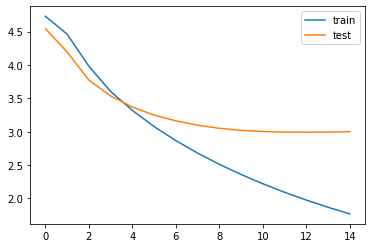

In [33]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [34]:
src_index_to_word = src_tokenizer.index_word # ÏõêÎ¨∏ Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ï†ïÏàò -> Îã®Ïñ¥Î•º ÏñªÏùå
tar_word_to_index = tar_tokenizer.word_index # ÏöîÏïΩ Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Îã®Ïñ¥ -> Ï†ïÏàòÎ•º ÏñªÏùå
tar_index_to_word = tar_tokenizer.index_word # ÏöîÏïΩ Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ï†ïÏàò -> Îã®Ïñ¥Î•º ÏñªÏùå

In [43]:
import numpy as np
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Attention, Concatenate
from tensorflow.keras.models import Model

hidden_units = 256  # LSTM ÏùÄÎãâ ÏÉÅÌÉú ÌÅ¨Í∏∞
max_text_len = 50  # ÏõêÎ¨∏ ÏµúÎåÄ Í∏∏Ïù¥
max_summary_len = 12  # ÏöîÏïΩÎ¨∏ ÏµúÎåÄ Í∏∏Ïù¥

# **Ïù∏ÏΩîÎçî Î™®Îç∏ ÏÉùÏÑ± (ÌõàÎ†®Îêú Ïù∏ÏΩîÎçî ÏÇ¨Ïö©)**
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# **ÎîîÏΩîÎçî ÏûÖÎ†• Ï†ïÏùò**
decoder_inputs = Input(shape=(1,))  # Ìïú Îã®Ïñ¥Ïî© ÏûÖÎ†• (ÌÉÄÍ≤ü ÏãúÌÄÄÏä§Î•º ÏÉùÏÑ±Ìï† Îïå ÏÇ¨Ïö©)
decoder_state_input_h = Input(shape=(hidden_units,))
decoder_state_input_c = Input(shape=(hidden_units,))

#  **ÎîîÏΩîÎçî ÏûÑÎ≤†Îî© (ÌõàÎ†®Îêú ÏûÑÎ≤†Îî© Î†àÏù¥Ïñ¥ Ïû¨ÏÇ¨Ïö©)**
dec_emb_layer = Embedding(input_dim=tar_vocab, output_dim=128, mask_zero=True)  # ‚úÖ ÌõàÎ†® Î™®Îç∏Í≥º ÎèôÏùºÌïú ÏûÑÎ≤†Îî© Î†àÏù¥Ïñ¥
dec_emb2 = dec_emb_layer(decoder_inputs)  

#  **ÎîîÏΩîÎçî LSTM (Ïù¥Ï†Ñ ÏÉÅÌÉúÎ•º ÏûÖÎ†•ÏúºÎ°ú ÏÇ¨Ïö©)**
decoder_lstm = LSTM(hidden_units, return_sequences=True, return_state=True, dropout=0.2)  # ‚úÖ ÌõàÎ†® Î™®Îç∏Í≥º ÎèôÏùºÌïú LSTM
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#  **Ïñ¥ÌÖêÏÖò Ï†ÅÏö©**
decoder_hidden_state_input = Input(shape=(max_text_len, hidden_units))  # ‚úÖ Ïù∏ÏΩîÎçî Ï∂úÎ†• Î∞õÏùå
attention_layer = Attention()  # ‚úÖ ÌõàÎ†® Î™®Îç∏Í≥º ÎèôÏùºÌïú Ïñ¥ÌÖêÏÖò Î†àÏù¥Ïñ¥
attn_out_inf = attention_layer([decoder_outputs2, decoder_hidden_state_input])

#  **Ïñ¥ÌÖêÏÖò Í≤∞Ìï©**
decoder_inf_concat = Concatenate(axis=-1)([decoder_outputs2, attn_out_inf])

# ÎîîÏΩîÎçî Ï∂úÎ†•Ï∏µ (Softmax)**
decoder_dense = Dense(tar_vocab, activation='softmax')  # ‚úÖ ÌõàÎ†® Î™®Îç∏Í≥º ÎèôÏùºÌïú Ï∂úÎ†•Ï∏µ
decoder_outputs2 = decoder_dense(decoder_inf_concat)

#  **ÏµúÏ¢Ö ÎîîÏΩîÎçî Î™®Îç∏ ÏÉùÏÑ±**
decoder_model = Model(
    [decoder_inputs, decoder_hidden_state_input, decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2, state_h2, state_c2]
)

#  **ÏòàÏ∏° Ìï®Ïàò (decode_sequence)**
def decode_sequence(input_seq, temperature=0.8):
    # 1Ô∏è‚É£ **Ïù∏ÏΩîÎçîÎ•º ÌÜµÌï¥ Ï¥àÍ∏∞ ÏÉÅÌÉú(state) Í∞ÄÏ†∏Ïò§Í∏∞**
    e_out, e_h, e_c = encoder_model.predict(input_seq)

    # 2Ô∏è‚É£ **ÎîîÏΩîÎçî ÏûÖÎ†•ÏùÑ <SOS> ÌÜ†ÌÅ∞ÏúºÎ°ú Ï¥àÍ∏∞Ìôî**
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = []

    while not stop_condition:
        # 3Ô∏è‚É£ **ÎîîÏΩîÎçîÎ°ú Ìïú Îã®Í≥Ñ ÏòàÏ∏° ÏàòÌñâ**
        output_tokens, h, c = decoder_model.predict([target_seq, e_out, e_h, e_c])

        # 4Ô∏è‚É£ **Temperature Sampling Ï†ÅÏö©ÌïòÏó¨ ÎûúÎç§Ìïú Îã®Ïñ¥ ÏÑ†ÌÉù**
        output_tokens = np.asarray(output_tokens[0, -1, :]).astype("float64")
        output_tokens = np.log(output_tokens + 1e-10) / temperature  # ÌôïÎ•† Î∂ÑÌè¨ Ï°∞Ï†ï
        exp_preds = np.exp(output_tokens)
        output_tokens = exp_preds / np.sum(exp_preds)
        sampled_token_index = np.random.choice(len(output_tokens), p=output_tokens)

        # 5Ô∏è‚É£ **Í∞ÄÏû• ÎÜíÏùÄ ÌôïÎ•†Ïùò Îã®Ïñ¥ ÏÑ†ÌÉù**
        sampled_word = tar_index_to_word.get(sampled_token_index, "")

        # 6Ô∏è‚É£ **<EOS> ÌÜ†ÌÅ∞Ïù¥ ÎÇòÏò§Î©¥ Ï§ëÎã®**
        if sampled_word != "eostoken":
            decoded_sentence.append(sampled_word)

        if sampled_word == "eostoken" or len(decoded_sentence) >= (max_summary_len - 1):
            stop_condition = True

        # 7Ô∏è‚É£ **ÎîîÏΩîÎçî ÏûÖÎ†•ÏùÑ ÏóÖÎç∞Ïù¥Ìä∏**
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # 8Ô∏è‚É£ **ÏÉÅÌÉú ÏóÖÎç∞Ïù¥Ìä∏**
        e_h, e_c = h, c

    return " ".join(decoded_sentence)  # Î¶¨Ïä§Ìä∏Î•º Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò


In [44]:
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

In [45]:
def seq2summary(input_seq):
    temp = ''
    for i in input_seq:
        if (i != 0 and i != tar_word_to_index['sostoken'] and i != tar_word_to_index['eostoken']):  # SOS, EOS Ï†úÍ±∞
            temp = temp + tar_index_to_word[i] + ' '
    return temp.strip()  

In [46]:
for i in range(50, 100):
    print("ÏõêÎ¨∏ :", seq2text(encoder_input_test[i]))
    print("Ïã§Ï†ú ÏöîÏïΩ :", seq2summary(decoder_input_test[i]))
    print("ÏòàÏ∏° ÏöîÏïΩ :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

ÏõêÎ¨∏ : amitabh bachchan donated lakh earth foundation ngo works towards welfare senior citizens ngo founder ravi kalra participated recent episode kaun banega crorepati revealed bachchan moved ngo efforts towards taking care elderly money spent food medicines kalra added 
Ïã§Ï†ú ÏöîÏïΩ : big donates lakh charity senior citizen welfare
ÏòàÏ∏° ÏöîÏïΩ : publishing kabhi indrani paresh patidar brides bureaucrats nana corpse breath reported


ÏõêÎ¨∏ : former indian captain mahendra singh dhoni visited india office chennai first odi met chennai super kings owner srinivasan visit comes ahead csk return ipl next year serving two year suspension due owners alleged involvement ipl spot fixing scam company termed visit official one 
Ïã§Ï†ú ÏöîÏïΩ : dhoni meets csk owner srinivasan chennai odi
ÏòàÏ∏° ÏöîÏïΩ : avert debit valid approve lathicharge cremated colour nepotism funny crosses agency


ÏõêÎ¨∏ : us couple got married ladies toilet groom mother fell ill wedding day rushed washroom ceremony

ÏòàÏ∏° ÏöîÏïΩ : dussehra branson rijiju dupes schools abvp nightclub shelf statements threaten lenin


ÏõêÎ¨∏ : television personality kylie jenner snapchat hacked hacker posted message caption add kylie jenner followed post alleged hacker twitter account read got kylie however hour later supposed hacker wrote joke nude pictures kylie 
Ïã§Ï†ú ÏöîÏïΩ : hacker threatens leak kylie jenner nude pictures
ÏòàÏ∏° ÏöîÏïΩ : diplomacy lifetime lady swift backward onion last queries paint seller gautam


ÏõêÎ¨∏ : reacting hollywood actor jaden smith tweet saying wants star bollywood movie user wrote incoming offer bigg boss another user photoshopped jaden poster shah rukh khan deepika padukone om shanti om caption say user also photoshopped jaden family kabhi khushi kabhie gham poster 
Ïã§Ï†ú ÏöîÏïΩ : twitter reacts smith wish bollywood film
ÏòàÏ∏° ÏöîÏïΩ : slack surfaces interrupts defamation patekar reform assured cobra carat free surrogacy


ÏõêÎ¨∏ : reserve bank india announced area single la

ÏòàÏ∏° ÏöîÏïΩ : lara truth richards demo cries refuse fm reduced poonawalla sacha affecting


ÏõêÎ¨∏ : congress president rahul gandhi thursday said centre focus upa era defence deals instead finalising causing life risks indian air force pilots deal worked anil ambani benefit reduced aircraft made france added aircraft take years arrive india said 
Ïã§Ï†ú ÏöîÏïΩ : centre putting iaf pilots risk rahul gandhi
ÏòàÏ∏° ÏöîÏïΩ : regulation activities strips buyer disease posed copy peacekeepers akram clown tortured


ÏõêÎ¨∏ : russian air force begin training female military pilots first time since fall soviet union defence minister sergey said many young women want become military pilots cannot ignore requests added said first group female cadets begin training october 
Ïã§Ï†ú ÏöîÏïΩ : women train pilots russia st time since
ÏòàÏ∏° ÏöîÏïΩ : meals mevani patriotism space prepares usain reality prepared th sting rubber


ÏõêÎ¨∏ : actress renuka shahane took facebook pen tribute late reema lag

ÏòàÏ∏° Î™®Îç∏Ïù¥ ÎßéÏù¥ ÎÇòÏò® Îã®Ïñ¥Îì§ÏùÑ Î∞òÎ≥µÌï©ÎãàÎã§


abhiyan abhiyan engagement engagement engagement engagement engagement engagement engagement engagement engagement

dollar dollar dollar gods gods gods gods gods gods gods gods

Î≠îÍ∞Ä ÏûòÎ™ªÎêòÏóàÏäµÎãàÎã§.

->

temperature Í∞íÏùÑ Ï∂îÍ∞ÄÌïòÏó¨ Í∞ôÏùÄ Îã®Ïñ¥Í∞Ä Î∞òÎ≥µÎêòÎäî Î¨∏Ï†ú Ìï¥Í≤∞

np.random.choice()Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÌôïÎ•†Ï†ÅÏúºÎ°ú Îã§ÏñëÌïú Îã®Ïñ¥ ÏÑ†ÌÉù Í∞ÄÎä•

Í∏∞Ï°¥ np.argmax() ÎåÄÏã† ÌôïÎ•† Ï°∞Ï†ï Ï†ÅÏö©

ÎèÑÏõÄÏùÑ Î∞õÏïÑ Ìï¥Í≤∞ÌïòÏòÄÏäµÎãàÎã§. -> shell amazing appoints wales experienced astronaut rgv rahat tries grofers bodyguard




import random
from summa.summarizer import summarize

# 1Ô∏è‚É£ **ÎûúÎç§Ìïú ÏÉòÌîå ÏÑ†ÌÉù (ÏõêÎ≥∏ ÌÖçÏä§Ìä∏ ÏÇ¨Ïö©)**
sample_idx = random.randint(0, len(data) - 1)  # ‚úÖ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÎûúÎç§ ÏÑ†ÌÉù
sample_text = data['text'].iloc[sample_idx]   # ‚úÖ ÏõêÎ≥∏ ÌÖçÏä§Ìä∏ Í∞ÄÏ†∏Ïò§Í∏∞

# 2Ô∏è‚É£ **Summa ÏöîÏïΩ Ïã§Ìñâ (Î¨∏Ïû•Ïù¥ 3Í∞ú Ïù¥ÏÉÅÏù∏ÏßÄ ÌôïÏù∏)**
if len(sample_text.split('.')) < 3:  # ‚úÖ SummaÎäî ÏµúÏÜå 3Í∞ú Î¨∏Ïû•Ïù¥ ÌïÑÏöîÌï®
    print("\n‚ö†Ô∏è Summa ÏöîÏïΩ Ïã§Ìå®: Î¨∏Ïû•Ïù¥ 3Í∞ú Ïù¥ÏÉÅ ÌïÑÏöîÌï©ÎãàÎã§.")
    extractive_summary = "Summa ÏöîÏïΩ Ïã§Ìå®: Î¨∏Ïû•Ïù¥ Î∂ÄÏ°±Ìï©ÎãàÎã§."
    extractive_summary_words = "Summa ÏöîÏïΩ Ïã§Ìå®: Î¨∏Ïû•Ïù¥ Î∂ÄÏ°±Ìï©ÎãàÎã§."
else:
    # 3Ô∏è‚É£ **Summa Ï∂îÏ∂úÏ†Å ÏöîÏïΩ Ïã§Ìñâ**
    extractive_summary = summarize(sample_text, ratio=0.5)  # ‚úÖ ratioÎ•º 0.5Î°ú Ï¶ùÍ∞Ä
    extractive_summary_words = summarize(sample_text, words=30)  # ‚úÖ ÏµúÏÜå 30Îã®Ïñ¥ Î≥¥Ïû•

    # 4Ô∏è‚É£ **Summa ÏöîÏïΩÏù¥ Ïã§Ìå®Ìïú Í≤ΩÏö∞ ÏòàÏô∏ Ï≤òÎ¶¨**
    if not extractive_summary.strip():
        extractive_summary = "Summa ÏöîÏïΩ Ïã§Ìå®: ÏöîÏïΩÌï† ÎÇ¥Ïö©Ïù¥ Î∂ÄÏ°±Ìï©ÎãàÎã§."
    
    if not extractive_summary_words.strip():
        extractive_summary_words = "Summa ÏöîÏïΩ Ïã§Ìå®: ÏöîÏïΩÌï† ÎÇ¥Ïö©Ïù¥ Î∂ÄÏ°±Ìï©ÎãàÎã§."

# 5Ô∏è‚É£ **ÎπÑÍµê Í≤∞Í≥º Ï∂úÎ†•**
print("\nüìå **ÏõêÎ¨∏:**")
print(sample_text)

print("\nüîπ **Ï∂îÏ∂úÏ†Å ÏöîÏïΩ (Summa, ratio=0.5)**:")
print(extractive_summary)

print("\nüîπ **Ï∂îÏ∂úÏ†Å ÏöîÏïΩ (Summa, 30Îã®Ïñ¥ Ï†úÌïú)**:")
print(extractive_summary_words)





# summa ÏöîÏïΩÏù¥ ÎêòÏßÄÏïäÏùå

summaryÍ∞Ä ÎêòÏßÄ ÏïäÎäîÍ≤ÉÏúºÎ°ú ÌôïÏù∏Îê©ÎãàÎã§. Î≠êÍ∞Ä Î¨∏Ï†úÏùºÍπåÏöî?

ÏõêÎ¨∏ÏùÑ Î¥§ÏùÑ Îïå Ïùå.... Íµ¨ÎëêÏ†êÏù¥ ÏóÜÏñ¥ÏÑú Í∑∏Îü∞Í±∞ ÏùºÍπåÏöî.

encoder_inputdataÎ•º Ïç®ÏÑú Ïù¥ÎØ∏ ÌÜ†ÌÅ∞ÌôîÍ∞Ä ÎêúÍ≤ÉÏù¥ÎùºÏÑú ÌïòÏßÄ Î™ªÌïòÎäîÍ≤ÉÏúºÎ°ú Í∞ÄÏÑ§ÏùÑ ÏÑ∏Ïõ†ÏäµÎãàÎã§.

-> ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Ïì∞Í∏∞ -> Í∑∏Îü∞Îç∞ÎèÑ ÏïàÎêòÏñ¥ÏÑú Ïùå... Î©îÌä∏Î¶≠Ïä§ ÌÖçÏä§Ìä∏Î°ú Îã§ÏãúÌï¥Î≥¥Í≤†ÏäµÎãàÎã§.


In [76]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

import urllib.request
import pandas as pd
from summa.summarizer import summarize
import numpy as np


for idx, (head, text) in enumerate(zip(data['headlines'], data['text'])):
    if idx == 10:
        break  # ÏÉÅÏúÑ 10Í∞úÎßå Ï∂úÎ†•

    # Summ
    text_length = len(text.split())  # ÏõêÎ¨∏ Îã®Ïñ¥ Ïàò Í≥ÑÏÇ∞
    ratio = min(0.4, 20 / text_length)  # ÏõêÎ¨∏Ïù¥ ÏßßÏúºÎ©¥ ratio ÏûêÎèô Ï°∞Ï†ï
    summa_summary = summarize(text, ratio=ratio)  # Summa ÏöîÏïΩ ÏàòÌñâ

    if not summa_summary.strip():
        summa_summary = "Summa ÏöîÏïΩ Ïã§Ìå®: ÏöîÏïΩÌï† ÎÇ¥Ïö©Ïù¥ Î∂ÄÏ°±Ìï©ÎãàÎã§."

    try:
        input_seq = np.array([encoder_input_test[idx]], dtype=np.float32)  
        abstractive_summary = decode_sequence(input_seq)  # ÎÑ§ Î™®Îç∏Ïùò ÏöîÏïΩ Ïã§Ìñâ
    except:
        abstractive_summary = "Seq2Seq ÏöîÏïΩ Ïã§Ìå®: ÏûÖÎ†• Ï≤òÎ¶¨ Ïò§Î•ò Î∞úÏÉù."

    # 
    print("\n **[{}] ÏõêÎ¨∏:**".format(idx + 1))
    print(text)

    print("\n **Ïã§Ï†ú ÏöîÏïΩ (headlines):**")
    print(head)

    print("\n Summa Ï∂îÏ∂úÏ†Å ÏöîÏïΩ:**")
    print(summa_summary)

    print("\n Seq2Seq Ï∂îÏÉÅÏ†Å ÏöîÏïΩ:**")
    print(abstractive_summary)

    print("=" * 100)  # Íµ¨Î∂ÑÏÑ† Ï∂îÍ∞Ä






 **[1] ÏõêÎ¨∏:**
Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers.

 **Ïã§Ï†ú ÏöîÏïΩ (headlines):**
upGrad learner switches to career in ML & Al with 90% salary hike

 Summa Ï∂îÏ∂úÏ†Å ÏöîÏïΩ:**
upGrad's Online Power Learning has powered 3 lakh+ careers.

 Seq2Seq Ï∂îÏÉÅÏ†Å ÏöîÏïΩ:**
shane reaction imitating israel external total nearby rises lit sugar oppose

 **[2] ÏõêÎ¨∏:**
Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coins. Users get one CRED coin per rupee of bill paid, which can be used to avail rewards from brands

ÎπÑÍµêÌï¥Î¥§ÏùÑ Îïå Ïã§Ï†úÏöîÏïΩÏóê ÎπÑÌï¥ÏÑú ÎëòÎã§ ÎßéÏù¥ Î∂ÄÏ°±Ìï®ÏùÑ ÎäêÎÅºÎäîÍ≤É Í∞ôÏäµÎãàÎã§ ....

1. Ï≤´Ïß∏Î°ú Ï†ÑÏ≤òÎ¶¨ Î∂ÄÎ∂ÑÏóêÏÑúÎèÑ Î≠îÍ∞Ä Î∂ÄÏ°±ÌïúÍ≤É Í∞ôÏäµÎãàÎã§.
2. ÏïÑÏßÅ Ï†úÍ∞Ä Î™®Îç∏Ïù¥ Ïù¥Í≤ÉÎì§ÏùÑ Ïñ¥ÎñªÍ≤å Î∞õÏïÑÎì§Ïù¥ÎäîÏßÄ Ïù¥Ìï¥ÌïòÏßÄ Î™ªÌïòÎäî Í≤É Í∞ôÏäµÎãàÎã§.

Î≥µÏäµÌïòÎ©¥ÏÑú Îçî Í≥µÎ∂ÄÌï¥ÏïºÌï† Í≤É Í∞ôÏäµÎãàÎã§.

# ÌöåÍ≥†Î°ù

modelÌïôÏäµÌïòÎäîÎç∞ ÏãúÍ∞ÑÏù¥ ÎÑàÎ¨¥ Í±∏Î†§ÏÑú... Î≠îÍ∞Ä Íº¨Ïù∏Í±∞ Í∞ôÏùÄÎç∞ Î≠îÏßÄ Î™®Î•¥Í≤†ÏäµÎãàÎã§
ÏïûÏúºÎ°ú Î°úÏª¨ÏóêÏÑú Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§... 

Ïã§ÏàòÎ°ú shift+enterÎ•º ÎàåÎ†ÄÎäîÎç∞ Îã§Ïãú ÌïòÎãàÍπå Ïò§Î•òÍ∞Ä ÎÇòÎäî Í≤ΩÏö∞ÎèÑ ÏûàÏñ¥ÏÑú ÏïÑÎßà Íº¨Ïù∏Í≤É Í∞ôÏäµÎãàÎã§.

ÏïåÍ≥†Î≥¥Îãà Ïª§ÎÑêÏù¥ Ïó∞Í≤∞ÎêòÏßÄ ÏïäÏïòÎçò Í≤É Í∞ôÏäµÎãàÎã§! „Öú„Öú

Í≥µÎ∂ÄÌïòÎäîÎç∞ Ïù¥Ìï¥ÎêòÏßÄ ÏïäÏùÄ Î∂ÄÎ∂ÑÏù¥ Ï¢Ä ÏûàÏñ¥ÏÑú Îã§Ïãú Í≥µÎ∂ÄÌïòÎ©∞ Ï∂îÍ∞ÄÌï¥ÏïºÌï† Í≤É Í∞ôÏäµÎãàÎã§.
